In [1]:
from graph_generator import read_input_file
matrix, start, goal = read_input_file('sample_input.txt', True)

Read from file....
Width=22, Height=18
Start: (2, 2)
Goal: (19, 16)
Found 3 Polygons
Done load input


<Figure size 640x480 with 1 Axes>

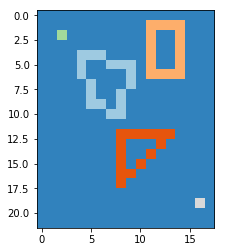

In [2]:
from matplotlib import pyplot as plt
matrix[start] = 5
matrix[goal] = 10
plt.imshow(matrix, cmap='tab20c')

In [3]:
print(matrix)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  3  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  3  0  0  0]
 [ 0  0  0  0  1  1  1  0  0  0  0  3  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0  1  1  1  0  3  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  1  0  3  3  3  3  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  2  2  2  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0